In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from pylab import *
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn import cluster
import matplotlib.pyplot as plt
import wordcloud

from time import time
import nltk
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Generador de nube de palabras**

In [2]:
txt_file = open("july_data.txt", "r")
file_content = txt_file.read()

In [3]:
notes_titles = file_content.split(",")
txt_file.close()

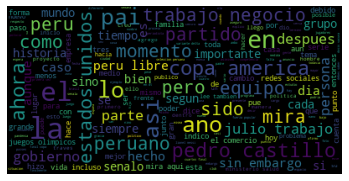

In [4]:
wc = wordcloud.WordCloud(background_color='black', 
                         max_font_size=35)
wc = wc.generate(str(notes_titles))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [5]:
wc.words_

{'afirmo': 0.10367372353673723,
 'agrego': 0.14103362391033625,
 'ahora': 0.40379825653798257,
 'ambo': 0.10803237858032379,
 'ano': 0.5569738480697385,
 'anuncio': 0.11690535491905354,
 'aseguro': 0.12608966376089664,
 'asi': 0.5437422166874222,
 'asimismo': 0.13060398505603985,
 'aun': 0.20470112079701122,
 'aunque': 0.25965130759651306,
 'bajo': 0.11410336239103362,
 'bien': 0.23739103362391034,
 'brasil': 0.10725404732254047,
 'cada': 0.2201120797011208,
 'cambio': 0.16251556662515568,
 'cargo': 0.12406600249066002,
 'casa': 0.19551681195516812,
 'casi': 0.11316936488169364,
 'caso': 0.2585616438356164,
 'centro': 0.10211706102117062,
 'cerca': 0.10538605230386053,
 'ciudad': 0.12889165628891655,
 'club': 0.11223536737235368,
 'como': 0.31491282689912825,
 'competencia': 0.11799501867995019,
 'con': 0.2064134495641345,
 'copa america': 0.44162515566625155,
 'cosa': 0.12437733499377335,
 'creo': 0.14819427148194272,
 'cuando': 0.12608966376089664,
 'cuartos final': 0.127334993773349

## **Clustering**

### TFID Vectorizer

In [21]:
stop_words = stopwords.words('spanish')
_new_stopwords_to_add = ["TE PUEDE", "TE", "PUEDE", "RECOMENDADO", "VIDEO","VIDEO RECOMENDADO", "PUEDE INTERESAR", "INTERESAR", "Sin embargo", "Además", "fue", "recomendado", "interesar", "video recomendado", "dijo", "además", "luego", "video", "también", "tambien", "mientras", "como", "solo", "lo", "en", "si", "la", "tras"]
stop_words.extend(_new_stopwords_to_add)

In [ ]:
bodies = open("july_data.txt", "r")
corpus = bodies.read().split('\n')

print("Using TFIDF Vectorizer to produce Sparse Matrix of Features")
t0 = time()

vectorizer = TfidfVectorizer(max_df=0.5,
                                 min_df=5, stop_words=stop_words)
X = vectorizer.fit_transform(corpus)
print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
print("__________________________________________________________")
print()

# Creates Cosine Similarity Matrix
cosine_similarity = (X * X.T).A

### Exploring K value

Using TFIDF Vectorizer to produce Sparse Matrix of Features
done in 2.183872s
n_samples: 19939, n_features: 28999
__________________________________________________________



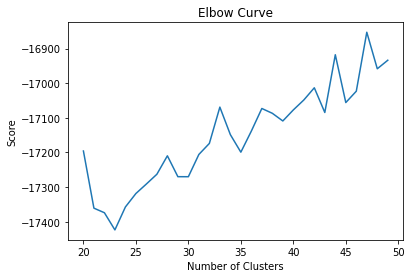

In [7]:
## PLOTS ELBOW CURVE to find the "K" value
Nc = range(20, 50)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()


### LSA dimension reduction AND Kmeans clustering

In [19]:
# LSA dimension reduction
print("Performing LSA Dimension Reduction")
t0 = time()
svd = TruncatedSVD(100)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(X)

print("done in %fs" % (time() - t0))

print()
print("AFTER LSA matrix reduction: ")
print("n_samples: %d, n_features: %d" % X.shape)


#K-MEANS CLUSTERING
km = KMeans(n_clusters=26, init='k-means++')
print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
y_means = km.predict(X)

Performing LSA Dimension Reduction
done in 5.234978s

AFTER LSA matrix reduction: 
n_samples: 19939, n_features: 100
Clustering sparse data with KMeans(n_clusters=26)


### STRONGEST TERMS

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


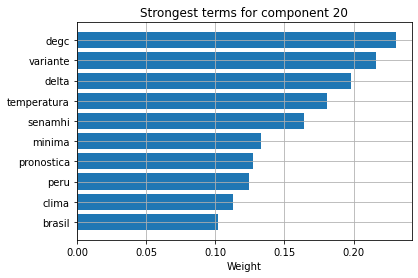

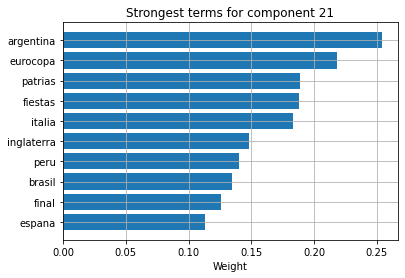

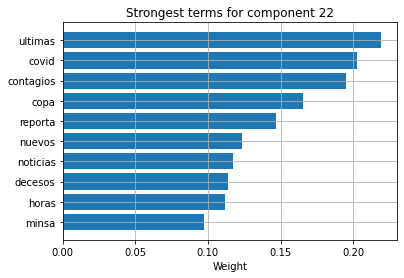

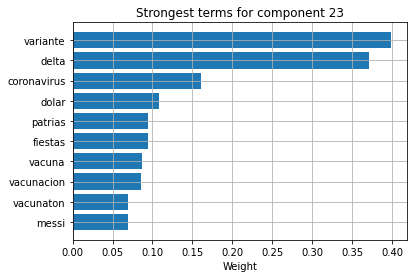

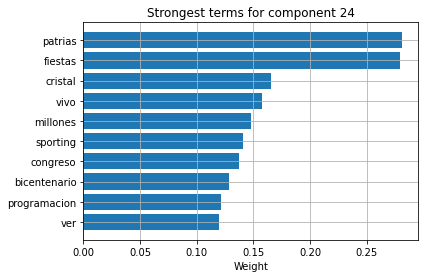

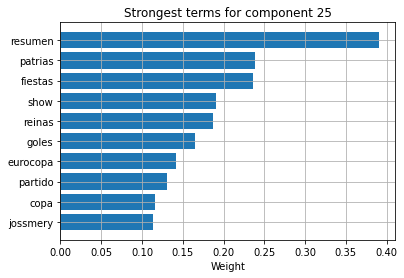

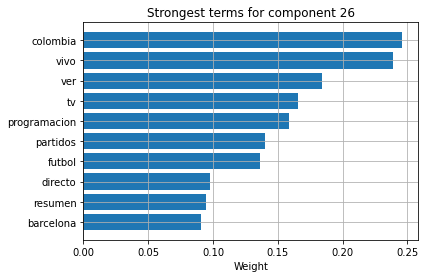

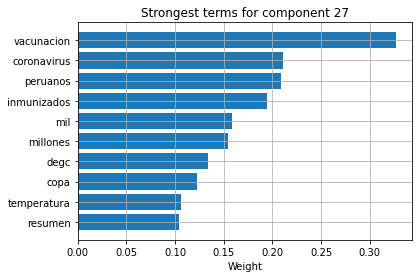

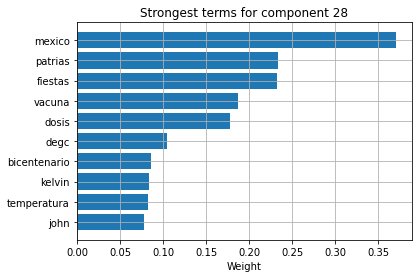

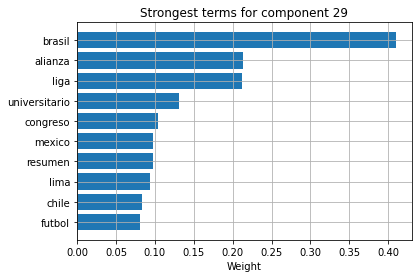

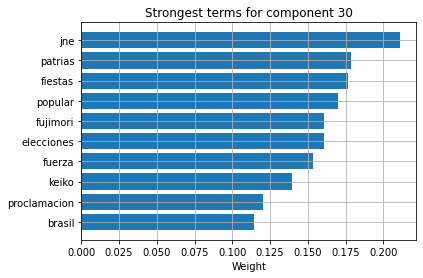

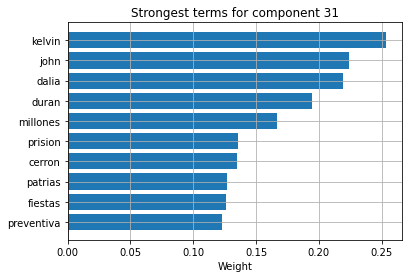

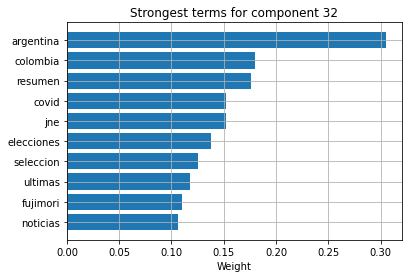

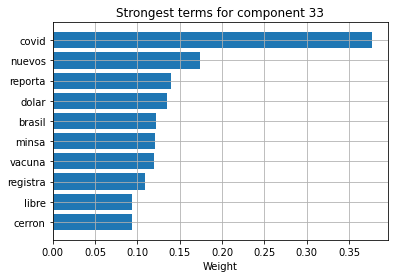

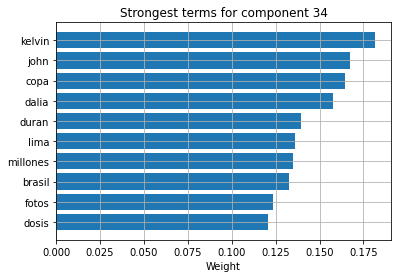

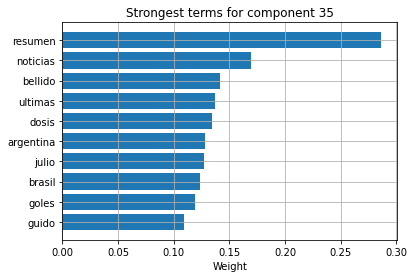

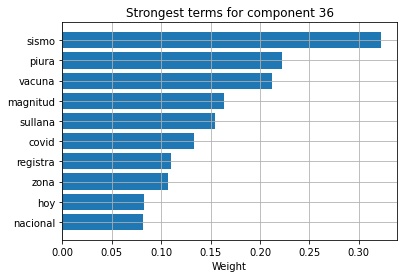

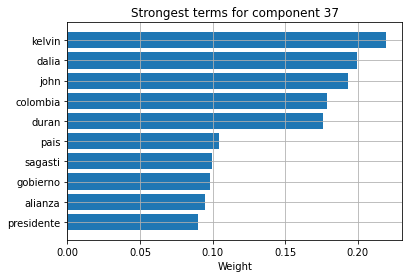

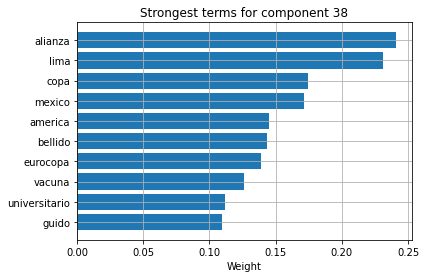

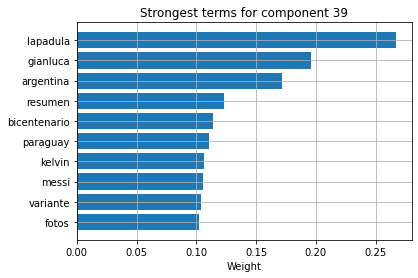

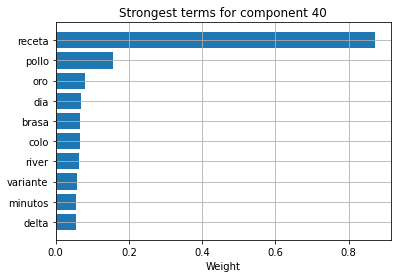

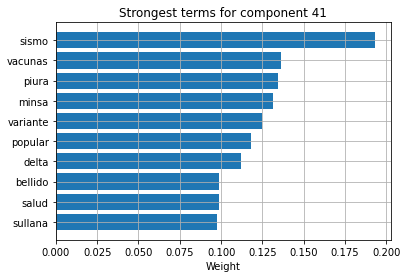

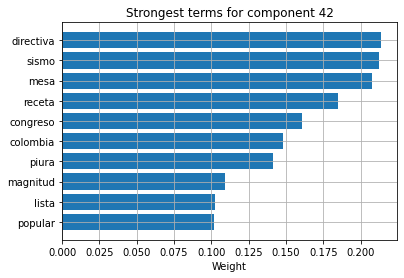

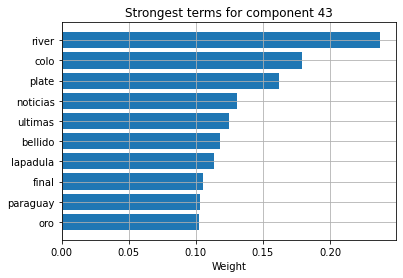

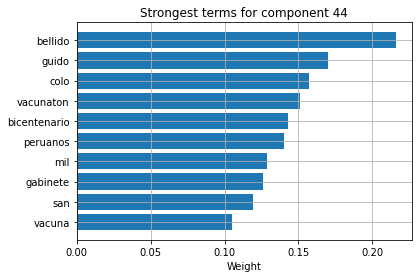

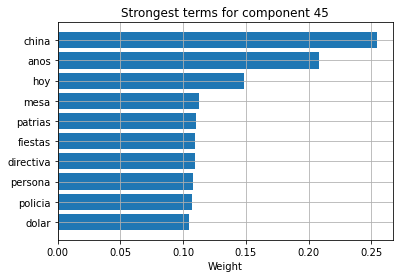

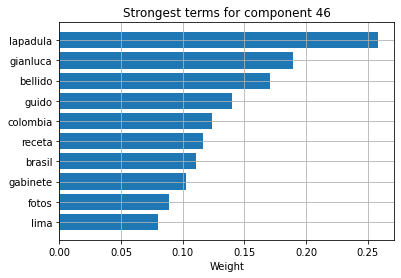

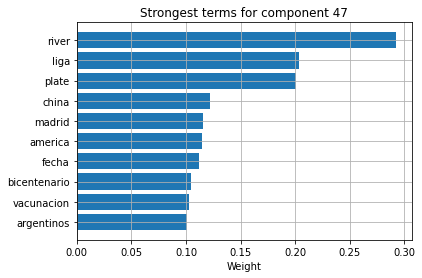

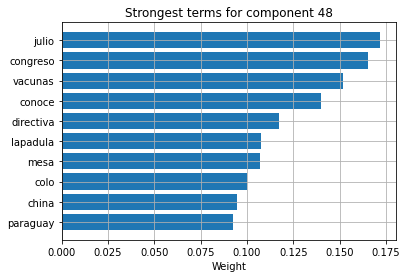

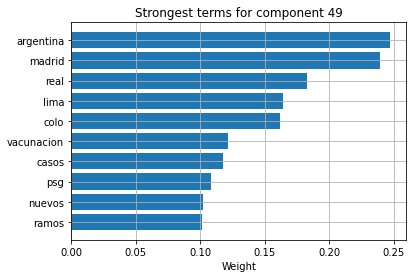

In [20]:
#VISUALIZES STRONGEST TERMS OF COMPONENTS (LSA)
feat_names = vectorizer.get_feature_names()

for compNum in range(20,50):
    comp = svd.components_[compNum]

    indeces = np.argsort(comp).tolist()
    indeces.reverse()
    terms = [feat_names[weightIndex] for weightIndex in indeces[0:10]]
    weights = [comp[weightIndex] for weightIndex in indeces[0:10]]

    terms.reverse()
    weights.reverse()
    positions = arange(10) + .5    # the bar centers on the y axis

    figure(compNum)
    barh(positions, weights, align='center')
    yticks(positions, terms)
    xlabel('Weight')
    title('Strongest terms for component %d' % (compNum))
    grid(True)
    show()